In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
from tensorflow.keras.layers import Input,Conv2D,MaxPool2D,Flatten,Dense,Reshape,UpSampling2D

In [5]:
in_layer = Input(shape=(28,28))
reshape = Reshape(target_shape=(28,28,1))(in_layer)
conv = Conv2D(32,kernel_size=3,activation="tanh",padding="same")(reshape)
pool = MaxPool2D()(conv)
conv = Conv2D(64,kernel_size=3,activation="tanh",padding="same")(pool)
pool = MaxPool2D()(conv)
flat = Flatten()(pool)
out_layer = Dense(units=30,activation="sigmoid")(flat)

In [6]:
from tensorflow.keras.models import Model


In [7]:
encoder = Model(in_layer,out_layer)
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0     

In [8]:
in_layer = Input(shape=(30,))
dense = Dense(units=7*7*64,activation="tanh")(in_layer)
reshape = Reshape(target_shape=(7,7,64))(dense)
conv = Conv2D(64,kernel_size=3,activation="tanh",padding="same")(reshape)
upsample = UpSampling2D()(conv)
conv = Conv2D(32,kernel_size=3,activation="tanh",padding="same")(upsample)
upsample = UpSampling2D()(conv)
conv = Conv2D(1,kernel_size=3,activation="sigmoid",padding="same")(upsample)
out_layer = Reshape(target_shape=(28,28))(conv)

In [9]:
decoder = Model(in_layer,out_layer)

In [10]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              97216     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 32)        0   

In [11]:
in_layer = Input(shape=(28,28))
encode_layer = encoder(in_layer)
decoder_layer = decoder(encode_layer)



In [12]:
autoencoder = Model(in_layer,decoder_layer)

In [13]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
model (Model)                (None, 30)                112926    
_________________________________________________________________
model_1 (Model)              (None, 28, 28)            152897    
Total params: 265,823
Trainable params: 265,823
Non-trainable params: 0
_________________________________________________________________


In [14]:
X = x_train.astype(float)/255

In [15]:
X.shape

(60000, 28, 28)

In [16]:
autoencoder.compile(optimizer="adam",loss="binary_crossentropy")



In [17]:
autoencoder.fit(X,X,batch_size=1000,epochs=10)

Epoch 1/10
60/60 [==============================] - 59s 979ms/step - loss: 0.2911

In [18]:
X_test = x_test.astype(float)/255

X_test.shape

(10000, 28, 28)

In [21]:
out = autoencoder.predict(X_test[:100])


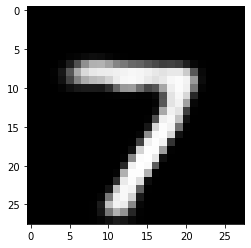

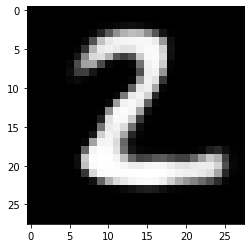

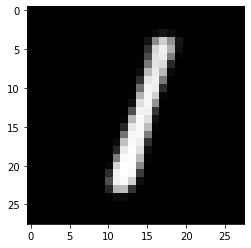

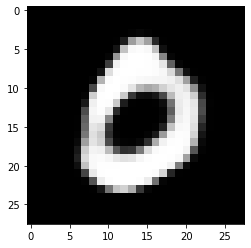

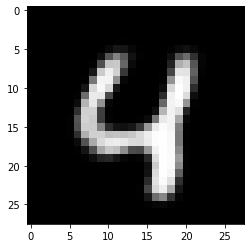

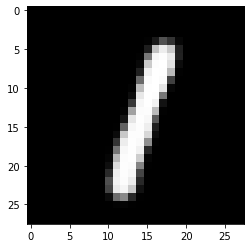

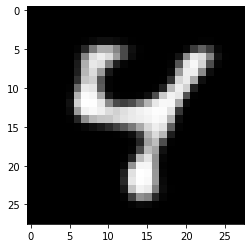

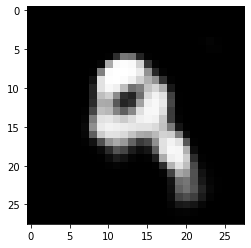

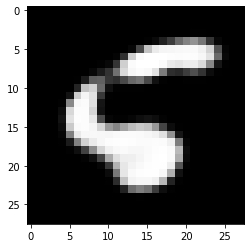

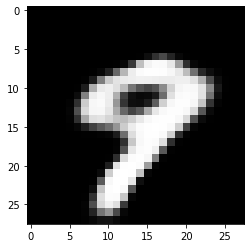

In [24]:
for i in range(10):
    plt.figure()
    plt.imshow(out[i],cmap="gray")
    plt.show()
